In [0]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [43]:
print(train_images[0].shape)

(28, 28)


In [0]:
print(train_images[0])

In [45]:
print(train_labels[0])

5


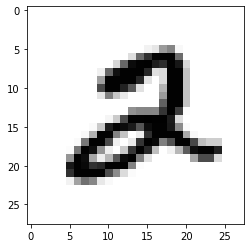

Label = 2


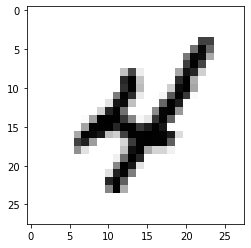

Label = 4


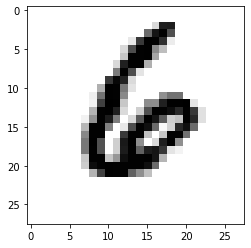

Label = 6


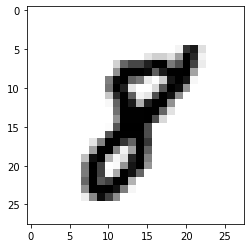

Label = 8


In [46]:
#Train sample images
for i in range(5, 20, 4):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

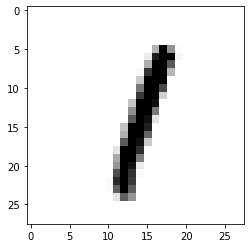

Label = 1


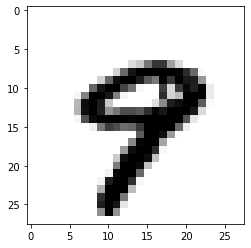

Label = 9


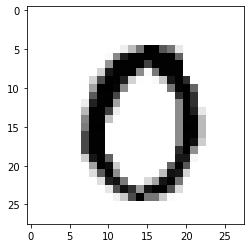

Label = 0


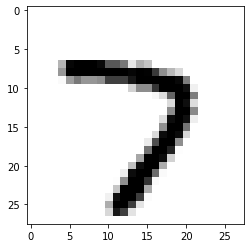

Label = 7


In [47]:
#Test sample images
for i in range(5, 20, 4):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(test_labels[i]))

In [48]:
#Perpare the data for training

print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


In [0]:
print(train_images[0])

In [50]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 28, 28) (10000,)
(10000, 784)


In [51]:
#One-Hot-Encoding for labels
print(train_labels[0])

5


In [52]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [53]:
test_labels = ku.to_categorical(test_labels)
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
#Defining a sequential model

nn = models.Sequential()
nn.add(layers.Dense(512, activation="relu", input_shape = (28*28, )))
nn.add(layers.Dense(10, activation="softmax"))

In [0]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
#Fit the model
nr.seed(9898)
set_random_seed(9777)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2610 - acc: 0.9236
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1057 - acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0703 - acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0518 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0389 - acc: 0.9881


In [57]:
#Evaluate
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 65us/step


[0.0696668460216315, 0.9801]

In [0]:
#Training Over Epochs

